# Paris Saclay Centre for Data Science

# TV Channel Commercial Detection

### Team project by CHEN Hang, XU Tao, FAN Zheng, TANG Xucheng

# Introduction

# Motivation
Automatic identification of commercial blocks in news videos finds a lot of applications in the domain of television broadcast analysis and monitoring. Commercials occupy almost 40-60% of total air time. Manual segmentation of commercials from thousands of TV news channels is time consuming, and economically infeasible hence prompts the need for machine learning based Method. Classifying TV News commercials is a semantic video classification problem. TV News commercials on particular news channel are combinations of video shots uniquely characterized by audio-visual presentation. Hence various audio visual features extracted from video shots are widely used for TV commercial classification. Indian News channels do not follow any particular news presentation format, have large variability and dynamic nature presenting a challenging machine learning problem. We note that in the Indian context, several channel specific assumptions do not hold and often news and commercials have comparable frequencies of occurrence. This motivates us to use the machine learning techniques for classifying commercials in news videos.

## Dataset Information
Features from 150 Hours of broadcast news videos from 5 different ( 3 Indian and 2 International News channels) news channels. Viz. CNNIBN, NDTV 24X7, TIMESNOW, BBC and CNN are presented in this dataset. Videos are recorded at resolution of 720 X 576 at 25 fps using a DVR and set top box. 3 Indian channels are recorded concurrently while 2 International are recorded together. Feature file preserves the order of occurrence of shots.

<img src="img/tv_commercial.png" width="60%">

## Requirements
- numpy>=1.13.3
- pandas>=0.21.0
- matplotlib>=1.5.1
- scikit-learn>=0.19.1
- seaborn >=0.8.1

## Attribute Information:
Video shots are used as unit for generating instances. Broadcast News videos are segmented into video shots using RGB Colour Histogram matching Between consecutive video frames. From each video shot we have extracted 7 Audio ( viz. Short term energy, zero crossing rate, Spectral Centroid, spectral Flux, spectral Roll off frequency, fundamental frequency and MFCC Bag of Audio Words) and 5 visual Features ( viz. Video shot length, Screen Text Distribution, Motion Distribution, Frame Difference Distribution, Edge Change Ratio) from each video shot. Details of each extracted feature are as follows.  

**attr1**	  -- Shot Length  
**attr2**    -- Motion Distribution(Mean)  
**attr3**	 -- Motion Distribution(Variance)  
**attr4**    -- Frame Difference Distribution(Mean)  
**attr5**	 -- Frame Difference Distribution(Variance)  
**attr6**    -- Short time energy(Mean)  
**attr7**	 -- Short time energy(Variance)  
**attr8**     -- ZCR(Mean)  
**attr9**	 -- ZCR(Variance)  
**attr10**   -- Spectral Centroid(Mean)  
**attr11**	 -- Spectral Centroid(Variance)  
**attr12**   -- Spectral Roll off(Mean)  
**attr13**	 -- Spectral Roll off(Variance)  
**attr14**   -- Spectral Flux(Mean)  
**attr15**	 -- Spectral Flux(Variance)  
**attr16**   -- Fundamental Frequency(Mean)  
**attr17**	 -- Fundamental Frequency(Variance)  
**attr18-58** -- Motion Distribution(40 bins)  
**attr59-74** -- Text area distribution(15 bins Mean)  
**attr75-89** -- Text area distribution(15 bins variance)  
**attr90-171**	-- Bag of Audio Words(4000 bins)  
**attr172-173**	-- Bag of Audio Words(4000 bins)  
**Label**	-- +1/-1 (Commercials/Non Commercials)

### Loading the data

In [63]:
from math import log, floor, ceil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
train_filename = 'data/BBC.csv'

In [65]:
data = pd.read_csv(train_filename)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14661 entries, 0 to 14660
Columns: 174 entries, attr1 to Label
dtypes: float64(172), int64(2)
memory usage: 19.5 MB


In [67]:
data.describe()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr165,attr166,attr167,attr168,attr169,attr170,attr171,attr172,attr173,Label
count,14661.000000,14661.000000,14661.000000,14661.000000,14661.000000,14661.000000,14661.000000,14661.000000,14661.000000,14661.000000,...,36.000000,5926.000000,6627.000000,4264.000000,2923.000000,5556.000000,1786.000000,14661.000000,14661.000000,14661.000000
mean,136.754655,1.985978,1.128625,7.435484,4.785170,0.011767,0.008297,0.075064,0.041870,2608.103618,...,0.010062,0.040853,0.044427,0.025681,0.025878,0.028587,0.005254,0.500733,0.498886,-0.146170
std,361.385829,2.518165,1.429062,8.573642,6.336302,0.008378,0.005745,0.053561,0.029995,1630.890913,...,0.019776,0.041930,0.049760,0.040319,0.046771,0.036212,0.011450,0.288255,0.286241,0.989293
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000119,0.000022,0.000059,0.000059,0.000110,0.000007,0.000116,0.000032,0.000078,-1.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001156,0.013158,0.013997,0.004738,0.003906,0.008582,0.001276,0.250306,0.253388,-1.000000
50%,67.000000,1.035897,0.633358,4.514017,2.377537,0.014350,0.010280,0.087340,0.048073,3520.207520,...,0.002947,0.026532,0.027778,0.012500,0.011230,0.017361,0.002546,0.499805,0.497647,-1.000000
75%,131.000000,2.908557,1.744372,10.972889,7.070223,0.017610,0.013089,0.113762,0.061953,3758.952393,...,0.008766,0.053243,0.054616,0.030889,0.028769,0.034722,0.005435,0.750796,0.745809,1.000000
max,33871.000000,21.679216,23.301861,67.285736,63.396584,0.035301,0.020839,0.394551,0.228486,3977.792725,...,0.079545,0.437500,0.513889,0.637500,0.862500,0.840909,0.222222,0.999842,0.999890,1.000000


In [68]:
data.count()

attr1      14661
attr2      14661
attr3      14661
attr4      14661
attr5      14661
attr6      14661
attr7      14661
attr8      14661
attr9      14661
attr10     14661
attr11     14661
attr12     14661
attr13     14661
attr14     14661
attr15     14661
attr16     14661
attr17     14661
attr18     10648
attr19     10647
attr20     10646
attr21     10646
attr22     10637
attr23     10616
attr24     10600
attr25     10572
attr26     10544
attr27     10502
attr28     10465
attr29     10431
attr30     10406
           ...  
attr145     2664
attr146     1959
attr147     9103
attr148    10148
attr149     7390
attr150     2316
attr151       59
attr152     9026
attr153      422
attr154     5438
attr155     2996
attr156     4409
attr157     8530
attr158      631
attr159      662
attr160     8438
attr161      642
attr162     4357
attr163     6521
attr164      911
attr165       36
attr166     5926
attr167     6627
attr168     4264
attr169     2923
attr170     5556
attr171     1786
attr172    146

In [69]:
data.groupby("Label").count()[['attr1']]

,attr1
Label,
-1,8402
1,6259


### Fill out the missing values

In [70]:
data = data.fillna(value=0)

In [71]:
data.count()

attr1      14661
attr2      14661
attr3      14661
attr4      14661
attr5      14661
attr6      14661
attr7      14661
attr8      14661
attr9      14661
attr10     14661
attr11     14661
attr12     14661
attr13     14661
attr14     14661
attr15     14661
attr16     14661
attr17     14661
attr18     14661
attr19     14661
attr20     14661
attr21     14661
attr22     14661
attr23     14661
attr24     14661
attr25     14661
attr26     14661
attr27     14661
attr28     14661
attr29     14661
attr30     14661
           ...  
attr145    14661
attr146    14661
attr147    14661
attr148    14661
attr149    14661
attr150    14661
attr151    14661
attr152    14661
attr153    14661
attr154    14661
attr155    14661
attr156    14661
attr157    14661
attr158    14661
attr159    14661
attr160    14661
attr161    14661
attr162    14661
attr163    14661
attr164    14661
attr165    14661
attr166    14661
attr167    14661
attr168    14661
attr169    14661
attr170    14661
attr171    14661
attr172    146

In [72]:
x_data = data.drop(['Label'],axis=1)
y_data = data[data.columns[-1]]

In [73]:
x_dataset = x_data.values
y_dataset = y_data.values

In [74]:
indices = np.random.permutation(len(x_dataset))
x_train = x_dataset[indices[:-3000]]
y_train = y_dataset[indices[:-3000]]
x_test = x_dataset[indices[-3000:]]
y_test = y_dataset[indices[-3000:]]

In [75]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11661, 173)
(11661,)
(3000, 173)
(3000,)


### Analyze the data

The Box plot of the attributes.  
It allows to visually estimate various L-estimators, notably the interquartile range, midhinge, range, mid-range, and trimean.

We can notice that the attributes without missing values have less outliers, and the attributes with many missiong values have a lot of outliers, and the most values gather at 0 because we have fill them out with 0. So it's better to remove those attributes to improve the prediction accuracy

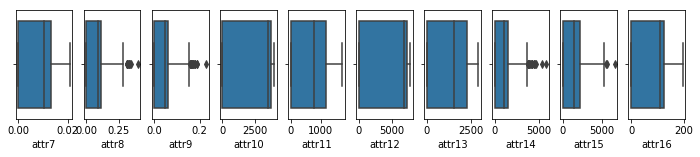

In [76]:
import seaborn as sns
fig, ax = plt.subplots(1,10, figsize=(12, 2))
sns.boxplot(x=data.columns[6], data=data, ax=ax[0])
sns.boxplot(x=data.columns[7], data=data, ax=ax[1])
sns.boxplot(x=data.columns[8], data=data, ax=ax[2])
sns.boxplot(x=data.columns[9], data=data, ax=ax[3])
sns.boxplot(x=data.columns[10], data=data, ax=ax[4])
sns.boxplot(x=data.columns[11], data=data, ax=ax[5])
sns.boxplot(x=data.columns[12], data=data, ax=ax[6])
sns.boxplot(x=data.columns[13], data=data, ax=ax[7])
sns.boxplot(x=data.columns[14], data=data, ax=ax[8])
sns.boxplot(x=data.columns[15], data=data, ax=ax[9])

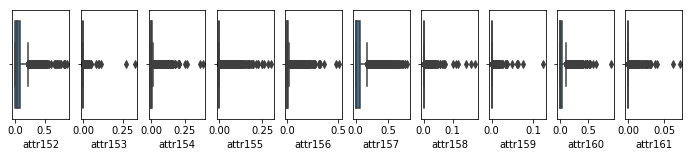

In [77]:
import seaborn as sns
fig, ax = plt.subplots(1,10, figsize=(12, 2))
sns.boxplot(x=data.columns[151], data=data, ax=ax[0])
sns.boxplot(x=data.columns[152], data=data, ax=ax[1])
sns.boxplot(x=data.columns[153], data=data, ax=ax[2])
sns.boxplot(x=data.columns[154], data=data, ax=ax[3])
sns.boxplot(x=data.columns[155], data=data, ax=ax[4])
sns.boxplot(x=data.columns[156], data=data, ax=ax[5])
sns.boxplot(x=data.columns[157], data=data, ax=ax[6])
sns.boxplot(x=data.columns[158], data=data, ax=ax[7])
sns.boxplot(x=data.columns[159], data=data, ax=ax[8])
sns.boxplot(x=data.columns[160], data=data, ax=ax[9])

Box plot of "attr2" and "attr153"  
For the x axis, one is commercial and another one is non-commercial  
The attributes focused on the 0 will have no contribution to the prediction

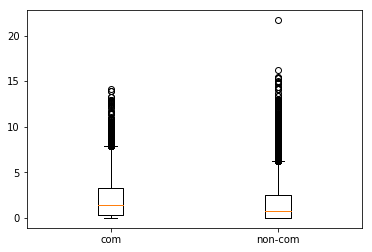

In [78]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot()
ax.boxplot([data[data.Label == 1].attr2.values, data[data.Label == -1].attr2.values])
ax.set_xticks([1, 2])
ax.set_xticklabels(['com', 'non-com'])
plt.show()

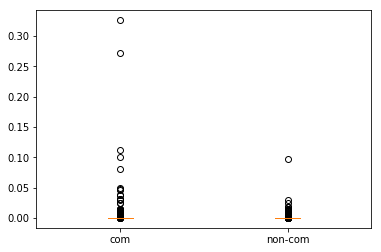

In [79]:
fig = plt.figure()
ax = plt.subplot()
ax.boxplot([data[data.Label == 1].attr153.values, data[data.Label == -1].attr153.values])
ax.set_xticks([1, 2])
ax.set_xticklabels(['com', 'non-com'])
plt.show()

The heatmap of the data  
We can know that attr2-attr17, attr18-attr58, attr59-attr74, they have the strong relation themselves. So we can have more operations for them in the future.

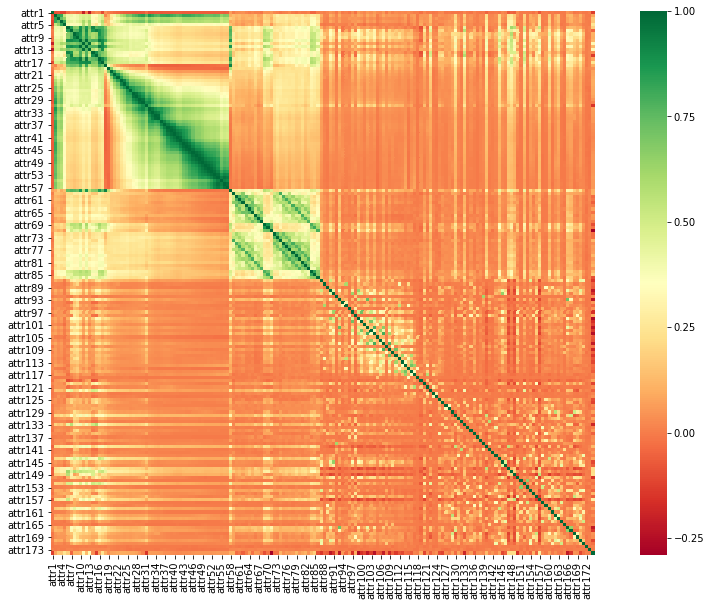

In [80]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), square=True,cmap='RdYlGn')
plt.show()

Compute the PCA

In [81]:
from sklearn.decomposition import PCA
estimator = PCA(n_components=15)
X_pca = estimator.fit_transform(data[1:16])
estimator.explained_variance_ratio_

array([6.88686066e-01, 2.30279911e-01, 6.01860918e-02, 1.93588316e-02,
       9.55752670e-04, 4.81332889e-04, 2.60827305e-05, 1.61772559e-05,
       7.12959135e-06, 1.88281064e-06, 6.40364267e-07, 7.51851749e-08,
       1.39333211e-08, 1.16132209e-08, 1.06404162e-32])

In [82]:
from sklearn.decomposition import PCA
estimator = PCA(n_components=50)
X_pca = estimator.fit_transform(data[17:57])
estimator.explained_variance_ratio_

array([6.85367257e-01, 1.83824911e-01, 9.88165458e-02, 2.37648208e-02,
       6.06862651e-03, 1.99287129e-03, 9.23918018e-05, 3.12358697e-05,
       2.59532456e-05, 7.66461039e-06, 6.64842785e-06, 5.76648312e-07,
       2.61102396e-07, 1.16055849e-07, 3.22795328e-08, 2.11258393e-08,
       1.77249194e-08, 1.33822828e-08, 6.89534038e-09, 5.30187974e-09,
       4.99235720e-09, 3.40549671e-09, 2.99575313e-09, 2.35760810e-09,
       1.61829265e-09, 1.46158943e-09, 1.20364254e-09, 8.49463662e-10,
       8.16816224e-10, 6.34149956e-10, 5.36693215e-10, 4.59183617e-10,
       2.97314436e-10, 2.59580441e-10, 2.00498971e-10, 1.47995465e-10,
       1.11413462e-10, 9.66334252e-11, 6.36878636e-11, 4.61614096e-33])

In [83]:
from sklearn.decomposition import PCA
estimator = PCA(n_components=50)
X_pca = estimator.fit_transform(data[58:73])
estimator.explained_variance_ratio_

array([7.14156816e-01, 2.36393851e-01, 2.72462525e-02, 1.86605821e-02,
       2.28098776e-03, 1.14552442e-03, 8.12940104e-05, 2.14476836e-05,
       1.04759420e-05, 2.09092258e-06, 6.34821648e-07, 2.59912821e-08,
       1.03438241e-08, 6.75563075e-09, 1.94541101e-33])

FacetGrid

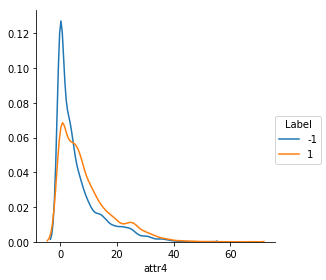

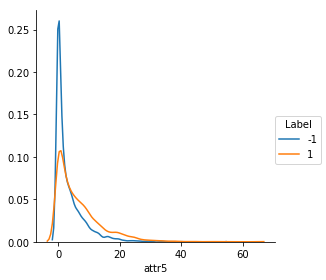

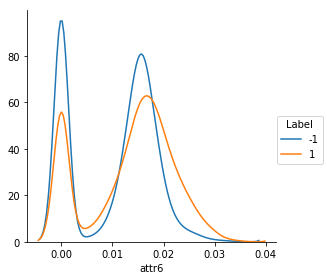

In [84]:
face = sns.FacetGrid(data,hue="Label",size=4)
face.map(sns.kdeplot,"attr4")
face.add_legend()
plt.show()
face = sns.FacetGrid(data,hue="Label",size=4)
face.map(sns.kdeplot,"attr5")
face.add_legend()
plt.show()
face = sns.FacetGrid(data,hue="Label",size=4)
face.map(sns.kdeplot,"attr6")
face.add_legend()
plt.show()

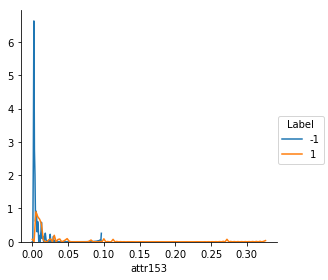

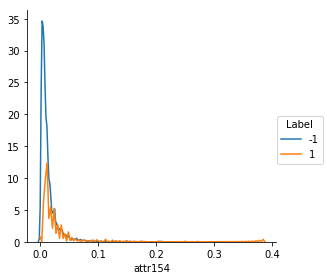

In [85]:
face = sns.FacetGrid(data,hue="Label",size=4)
face.map(sns.kdeplot,"attr153")
face.add_legend()
plt.show()
face = sns.FacetGrid(data,hue="Label",size=4)
face.map(sns.kdeplot,"attr154")
face.add_legend()
plt.show()

## The pipeline

For submitting at the [RAMP site](http://ramp.studio), you will have to write two classes, saved in two different files,
* the class `FeatureExtractor`, which will be used to extract features for classification from the dataset and produce a numpy array of size (number of samples $\times$ number of features), and  
* the class `Classifier` to predict the target.

### Feature extractor

The feature extractor implements a `transform` member function. It is saved in the file [`submissions/starting_kit/feature_extractor.py`](/edit/submissions/starting_kit/feature_extractor.py). It receives the pandas dataframe `X_df` defined at the beginning of the notebook. It should produce a numpy array representing the extracted features, which will then be used for the classification.  

Note that the following code cells are *not* executed in the notebook. The notebook saves their contents in the file specified in the first line of the cell, so you can edit your submission before running the local test below and submitting it at the RAMP site.

In [90]:
%%file submissions/starting_kit/feature_extractor.py
import numpy as np
from sklearn import preprocessing


class FeatureExtractor():
    def __init__(self):
        self.le = preprocessing.LabelEncoder()
        self.enc = preprocessing.OneHotEncoder()

    def fit(self, X_df, y):
        return self

    def transform(self, X_df):
        X_df_new = X_df.copy()
        for i in range(90,171):
            col = "attr" + str(i)
            X_df_new = X_df_new.drop([col], axis=1)
        X_df_new = self.compute_mean(X_df_new, 18, 58)
        return X_df_new


    def compute_mean(self, data, begin, end):
        name = "mean"+str(begin)+"and"+str(end)
        sum_data = 0
        for index in range(begin,end+1):
            sum_data += data[data.columns[index]]
        data[name] = sum_data/(end-begin)
        return data


Overwriting submissions/starting_kit/feature_extractor.py


### Classifier

The classifier follows a classical scikit-learn classifier template. It should be saved in the file [`submissions/starting_kit/classifier.py`](/edit/submissions/starting_kit/classifier.py). In its simplest form it takes a scikit-learn pipeline, assigns it to `self.clf` in `__init__`, then calls its `fit` and `predict_proba` functions in the corresponding member funtions.

In [91]:
%%file submissions/starting_kit/classifier.py
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier


class Classifier(BaseEstimator):
    def __init__(self):
        self.clf = RandomForestClassifier(n_estimators=50, random_state=125)

    def fit(self, X, y):
        self.clf.fit(X, y)

    def predict(self, X):
        return self.clf.predict(X)

    def predict_proba(self, X):
        return self.clf.predict_proba(X)

Overwriting submissions/starting_kit/classifier.py


In [88]:
# For testing
clf = Classifier()
clf.fit(x_train, y_train)

# Predicting
output = clf.predict(x_test)

In [89]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,output))

0.844


## Local testing (before submission)

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. For this we provide a unit test. Note that the test runs on your files in [`submissions/starting_kit`](/tree/submissions/starting_kit), not on the classes defined in the cells of this notebook.

First `pip install ramp-workflow` or install it from the [github repo](https://github.com/paris-saclay-cds/ramp-workflow). Make sure that the python files `classifier.py` and `feature_extractor.py` are in the  [`submissions/starting_kit`](/tree/submissions/starting_kit) folder, and the data `train.csv` and `test.csv` are in [`data`](/tree/data). Then run

```ramp_test_submission```

If it runs and print training and test errors on each fold, then you can submit the code.

You can use the `--quick-test` switch to test the notebook on the mock data sets in `data/`. Since the data is random, the scores will not be meaningful, but it can be useful to run this first on your submissions to make sure they run without errors.

In [92]:
!ramp_test_submission --quick-test

Testing TV Channel Commercial Detection
Reading train and test files from ./data ...
Reading cv ...
Training ./submissions/starting_kit ...
CV fold 0
	score  kappa  matthews  roc_auc    acc
	train  1.000     1.000    1.000  1.000
	valid  0.734     0.734    0.941  0.870
	test   0.741     0.742    0.943  0.873
CV fold 1
	score  kappa  matthews  roc_auc    acc
	train  1.000     1.000    1.000  1.000
	valid  0.729     0.730    0.938  0.869
	test   0.737     0.738    0.940  0.871
CV fold 2
	score  kappa  matthews  roc_auc    acc
	train  0.999     0.999    1.000  1.000
	valid  0.722     0.722    0.933  0.865
	test   0.733     0.733    0.937  0.869
CV fold 3
	score  kappa  matthews  roc_auc    acc
	train  1.000     1.000    1.000  1.000
	valid  0.724     0.725    0.935  0.866
	test   0.744     0.744    0.939  0.874
CV fold 4
	score  kappa  matthews  roc_auc    acc
	train  1.000     1.000    1.000  1.000
	valid  0.738     0.738    0.938  0.872
	test   0.739     0.739    0.942  0.872
CV fold 5


## Submitting to [ramp.studio](http://ramp.studio)

If you are eligible, you can join the team at [ramp.studio](http://www.ramp.studio). If it is your first time using RAMP, [sign up](http://www.ramp.studio/sign_up), otherwise [log in](http://www.ramp.studio/login). 

Once your signup request is accepted, you can go to your [sandbox](http://www.ramp.studio/events/kaggle_seguro/sandbox) and copy-paste (or upload) [`feature_extractor.py`](/edit/submissions/starting_kit/feature_extractor.py) and [`classifier.py`](/edit/submissions/starting_kit/classifier.py) from `submissions/starting_kit`. Save it, rename it, then submit it. The submission is trained and tested on our backend in the same way as `ramp_test_submission` does it locally. While your submission is waiting in the queue and being trained, you can find it in the "New submissions (pending training)" table in [my submissions](http://www.ramp.studio/events/kaggle_seguro/my_submissions). Once it is trained, you get a mail, and your submission shows up on the [public leaderboard](http://www.ramp.studio/events/fraud_detection/leaderboard).
If there is an error (despite having tested your submission locally with `ramp_test_submission`), it will show up in the "Failed submissions" table in [my submissions](http://www.ramp.studio/events/fraud_detection/my_submissions). You can click on the error to see part of the trace.

After submission, do not forget to give credits to the previous submissions you reused or integrated into your submission.

The data set we use at the backend is usually different from what you find in the starting kit, so the score may be different.

This latter combines the cross-validation models pointwise on the validation and test sets, and usually leads to a better score than the mean CV score. The RAMP [leaderboard](http://www.ramp.studio/events/fraud_detection/leaderboard) displays this score.

The official score in this RAMP (the first score column after "historical contributivity" on the [leaderboard](http://www.ramp.studio/events/fraud_detection/leaderboard)) is kappa statistic ("kappa"), so the line that is relevant in the output of `ramp_test_submission` is `kappa valid = 0.753`. When the score is good enough, you can submit it at the RAMP.

## More information

You can find more information in the [README](https://github.com/paris-saclay-cds/ramp-workflow/blob/master/README.md) of the [ramp-workflow library](https://github.com/paris-saclay-cds/ramp-workflow).